In [1]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import rv_continuous

In [18]:
def create_costs(mean,var):
    """create a cost function using scipy norm"""
    costs = rv_continuous()
    costs.pdf = lambda x: norm.pdf(x, loc=mean,scale=var)
    costs.cdf = lambda x: norm.cdf(x, loc=mean,scale=var)
    costs.rv =  lambda x: norm.rvs(loc=mean,scale=var,size=x)
    return costs


def calc_bid(vi, p, i, cost, nsims=20):
    """calculate bids based on vi and p"""
    
    n = len(vi)
    vi_tile = np.maximum(vi, p)
    vi_tile = np.repeat(vi_tile,nsims)
    p_tile = np.tile(p, n*nsims) #tile p for saftey
    
    sims = uniform.rvs(loc=p_tile, scale=vi_tile)
    sims = sims.reshape(n, nsims)
    
    integral = (vi>=p)*(cost.cdf(sims)**(i-1)).mean(axis=1)
    bids =  vi - integral/(cost.cdf(vi))**(i-1)
    
    print vi.min()
    print bids.min()
    
    return bids


def sim_auction(p,i,n,cost,nsims=20):
    """simulate auction data"""
    values = cost.rvs(size=(i*n)) #clip rhs of distribution
    bids = calc_bid(values,p,i,cost,nsims)
    return values, bids
    

P = .5
COST = create_costs(1.8,1)
I=2


values, bids = sim_auction(P,I, 100, COST,100)

-1.3358232186158807
-1.3358232186158807


-1.5404971462769035
-1.5404971462769035
-1.5404971462769035 -1.5404971462769035


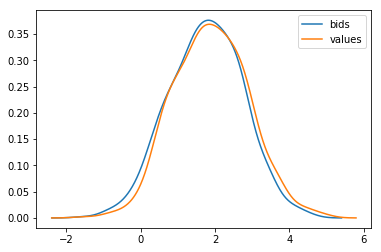

In [17]:
P = 0
COST = create_costs(1.8,1)
I=7

values, bids = sim_auction(P,I, 100, COST, 100)

print values.min(),bids.min()

bdens = sm.nonparametric.KDEUnivariate(bids)
vdens = sm.nonparametric.KDEUnivariate(values)

bdens.fit()
vdens.fit()

plt.plot(bdens.support, bdens.density, label='bids') #.cdf does cdf
plt.plot(vdens.support, vdens.density, label='values')
plt.legend()
plt.show()